**Question 1:**




The total number of ways in which we can select 10 socks are: 10C2 = 10!/(10-2)!2! = 10!/8!2! = 45

The Probablity of Success is: P(Blue Sock) = 0.2

The Probablity of Failure is: P(No Blue Sock) = 0.8

Using the formula of Binomial Probablity

P(2 Blue Sock) = 45 * (0.2)^2 * (0.8)^8
		   = 45 * 0.04 * 0.167
		   = 0.3006


Hence the Probablity that 2 socks are blue is approximately 30.06% out of 100%.

**Question 2:** (Had to use some reference)

**Using Bayes' theorem**

P(Spam | Free and Credit) = P(Free and Credit | Spam) * P(Spam) / P(Free and Credit)

I know that:

P(Spam) = 700 / 1000 = 0.7

P(Free | Spam) = 300 / 700 = 0.43
P(Credit | Spam) = 90 / 700 = 0.13

P(Free and Credit | Spam) = P(Free | Spam) * P(Credit | Spam) = 0.43 * 0.13 = 0.0559


**Now,**


To calculate P(Free and Credit), I considered two cases: the email is spam and the email is not spam.

If the email is spam, then:

P(Free and Credit | Spam) = 0.0559 (as calculated above)

P(Spam) = 0.7 (as given)

**Hence,**

P(Free and Credit) = P(Free and Credit | Spam) * P(Spam) + P(Free and Credit | Not Spam) * P(Not Spam)

P(Not Spam) = 300 / 1000 = 0.3

P(Free | Not Spam) = (400 - 300) / 300 = 0.33

P(Credit | Not Spam) = (100 - 90) / 300 = 0.03

P(Free and Credit | Not Spam) = P(Free | Not Spam) * P(Credit | Not Spam) = 0.33 * 0.03 = 0.0099

**Therefore,**

P(Free and Credit) = P(Free and Credit | Spam) * P(Spam) + P(Free and Credit | Not Spam) * P(Not Spam) = 0.0559 * 0.7 + 0.0099 * 0.3 = 0.04023

Finally,

P(Spam | Free and Credit) = P(Free and Credit | Spam) * P(Spam) / P(Free and Credit) = 0.0559 * 0.7 / 0.04023 = 0.973

So the probability that the email is spam given that it contains both "free" and "credit" is approximately 97.3%.

**Question 3:**

**Using `scatter.csv`: how do you interpret the linear regression?**

In [16]:
# Import Librarues
import numpy as np
import pandas as pd
import matplotlib as mp
from matplotlib import pyplot as plt

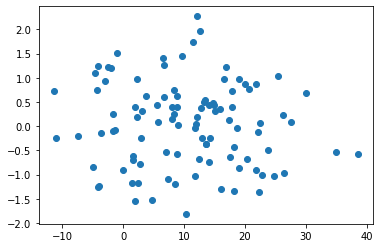

In [37]:
df = pd.read_csv('scatter.csv')
plt.scatter(df.x,df.y)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [42]:
x = df[['x']]
y = df[['y']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)  
result = LinearRegression().fit(X_train, y_train)

y_pred = result.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = r2_score(y_test,y_pred)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2:",r2)

MSE: 0.8412581641774465
RMSE: 0.9172012669951162
R2: -0.1349682641101151


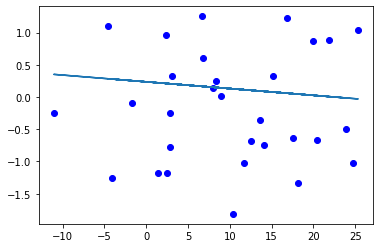

In [43]:
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test,y_pred)
plt.show()

Using the above graphs and results, I would interpret the linear regression graph as a really bad fit between the variables x and y. Moreover, the Negative R2 value and higher RMSE shows that the data isnt fitting the model well. This can also be seen in the graph above as the data is arbitarily distributed across the whole graph. 

**Question 4: Plot a Histogram of X Values**

Text(0, 0.5, 'Frequency')

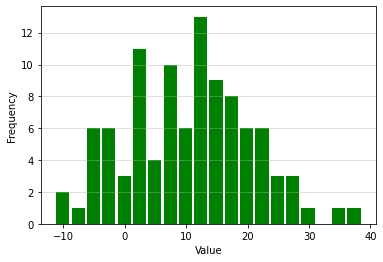

In [21]:
# Function to plot the histogram
plt.hist(x, bins= 20, color='green', rwidth=0.85)

# Grid lines and Labels
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Frequency')

**Question 5**

In [22]:
# Code for the SQL with screenshot
'''
SELECT
  test.timestamp AS date,
  COUNT(*) AS total_tests,
  SUM(CASE WHEN positive.id IS NOT NULL THEN 1 ELSE 0 END) AS total_positives,
  ROUND((SUM(CASE WHEN positive.id IS NOT NULL THEN 1 ELSE 0 END)*1.0) / COUNT(*) * 100, 2) AS positive_rate
FROM
  test
  LEFT JOIN positive ON test.id = positive.id
GROUP BY
  test.timestamp;
'''

'\nSELECT\n  test.timestamp AS date,\n  COUNT(*) AS total_tests,\n  SUM(CASE WHEN positive.id IS NOT NULL THEN 1 ELSE 0 END) AS total_positives,\n  ROUND((SUM(CASE WHEN positive.id IS NOT NULL THEN 1 ELSE 0 END)*1.0) / COUNT(*) * 100, 2) AS positive_rate\nFROM\n  test\n  LEFT JOIN positive ON test.id = positive.id\nGROUP BY\n  test.timestamp;\n'

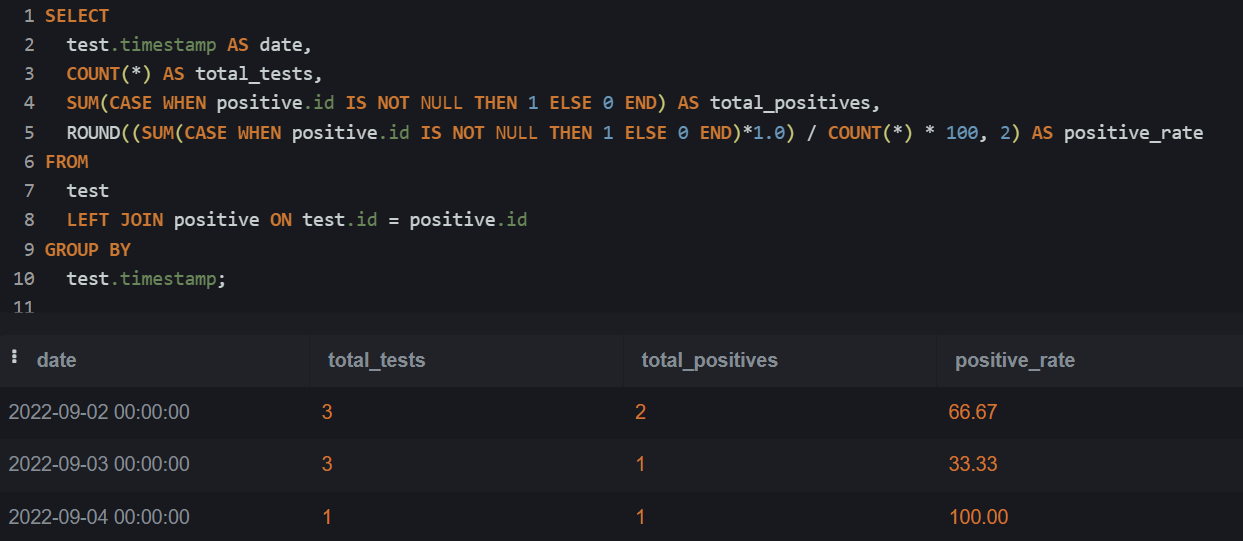

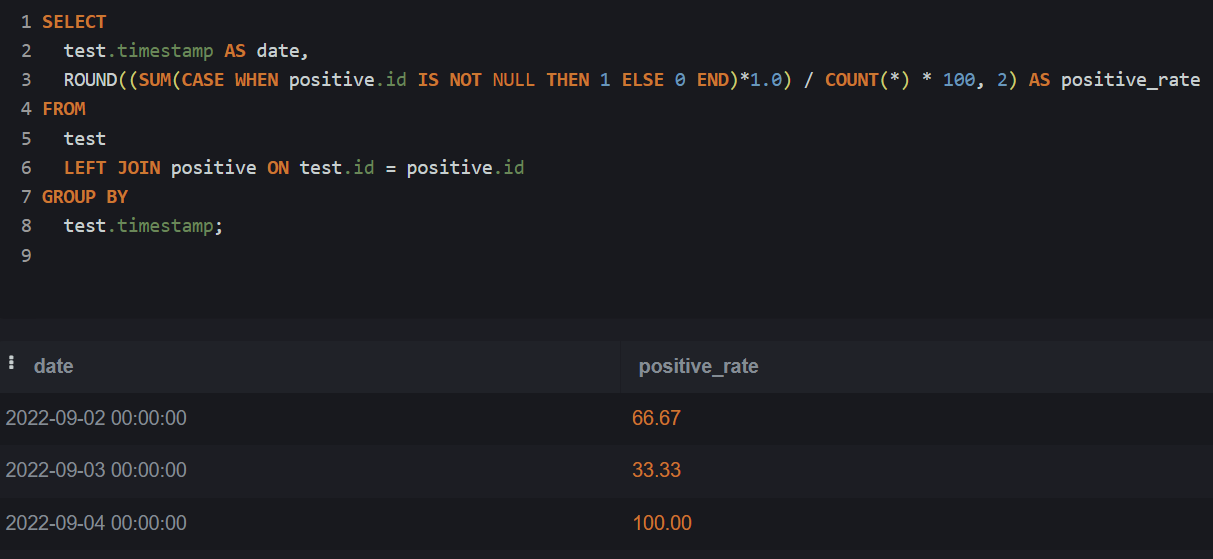

**Question 6**


**Summary of Approach**

To solve this question, we need to first understand the dataset. Initially there are 6 attributes in the training dataset out of which, only 4 are useful for training the data. We first load the data and select the perfect columns that we need. 

After this we train the data on the training data and predict the target variable (label column for the test data). This output can later be validated with the true data to check for the corectness using the RMSE principles. 

*The comments are self-explanotary and will help with the process and explaination of the technique followed* 


In [23]:
# Importing the required libraries and packages

import pandas as pd
import numpy as np
import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from imblearn.datasets import make_imbalance
from sklearn.linear_model import LogisticRegression


In [59]:
# Importing the files and naming the columns for the further analysis

train_data = pd.read_csv("train.csv", names = ["col1", "col2", "col3", "col4", "col5", "label"], header = None)
test_data = pd.read_csv("test.csv", names = ["col1", "col2", "col3", "col4", "col5"], header = None)

In [60]:
# Conversion of the target field to numeric (float)
train_data['label'] = pd.to_numeric(train_data['label'], downcast='float')

In [61]:
# Useful attributes in the test data
test_data.head()
test_data=test_data[["col3", "col4", "col5"]]

In [62]:
# Assigning values to x and y for model training

x = train_data[["col3", "col4", "col5"]]
y = train_data["label"]

In [63]:
# Counting the values of the target variables. 
print(y.value_counts())
y.value_counts() / len(train_data) * 100

0.0    703181
1.0    296819
Name: label, dtype: int64


0.0    70.3181
1.0    29.6819
Name: label, dtype: float64

In [64]:
# Since the data is imbalanced and there are more values towards 0, there is a high chance of overfitting that can happen with the data. 
# To avoid this, I am taking balanced sample from the data to get a better model 
 
X_train, y_train = make_imbalance(x, y, sampling_strategy={0.0: 290000, 1.0: 290000},random_state=21)

In [66]:
# XGBoost Algorithm

model = XGBRegressor()
model = model.fit(X_train, y_train)
y_test = model.predict(test_data)

[17:18:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Random Forest Algorithm

model2=RandomForestRegressor().fit(X_train,y_train)
y_test2= model2.predict(test_data)

In [67]:
# Moving the labels into the txt file as per the question
test_data["labels"]=y_test
test_data
test_data["labels"].to_csv("labels1.txt",header=True,index=False)



In [93]:
# Code for the RMSE test (TO BE VALIDATED BY OMG)

import numpy as np
from sklearn.metrics import mean_squared_error

# Get actual target values (true values are with Annalect)
#y_true = y_val

# Calculate mean squared error
#mse = mean_squared_error(y_true, y_test)

# Calculate root mean squared error
#rmse = np.sqrt(mse)
#print("RMSE: ", rmse)

In [92]:
## Cross Validation to evaluate training model

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=21)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
scores = scores*-1
print(scores)
print('Mean RMSE: %.3f (%.3f)' % (scores.mean(), scores.std()))

[-0.4957414  -0.49551103 -0.49608552 -0.49579296 -0.49556077 -0.49618942
 -0.49592036 -0.49618101 -0.49574217 -0.4961378  -0.49588346 -0.49594367
 -0.49608201 -0.49620032 -0.49611643 -0.49584946 -0.49536586 -0.49526712
 -0.49582493 -0.49597755 -0.49602082 -0.49578926 -0.49591863 -0.49595806
 -0.4960314  -0.49579683 -0.4958024  -0.49595857 -0.4955731  -0.49588338]
Mean RMSE: -0.496 (0.000)
